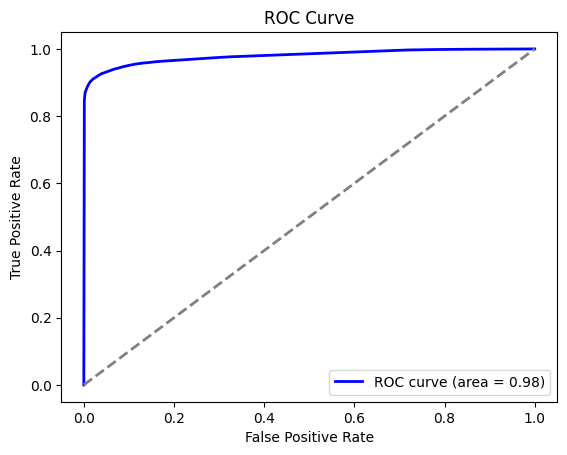

accuracy:  0.9449451116922923
confusion matrix:  [[29468   664]
 [ 2641 27258]]


0.9789908837606278

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/COM-C/Downloads/airlines_flights_data.csv")

df_sample = df.sample(n=50000, random_state=42)

median_price = df['price'].median()
df['expensive'] = (df['price'] > median_price).astype(int)

X = df.drop(columns=['index', 'price', 'expensive'])
y = df['expensive']

categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("accuracy: ", acc)
print("confusion matrix: ", cm)
roc_auc
